In [ ]:
from Params import *
from numpy import *
from PlotFuncs import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from numba import jit
from numpy import random
from scipy.integrate import cumtrapz
import cmocean

def costh2N(t,costh_X,phi_X,lat):
    # t in days
    lat *= pi/180
    wt = 2*pi*t
    th_X = arccos(costh_X)
    return (sin(th_X)*cos(phi_X)*sin(lat)*cos(wt) - sin(th_X)*sin(phi_X)*sin(lat)*sin(wt) + costh_X*cos(lat))**2

def costh2W(t,costh_X,phi_X,lat):
    # t in days
    lat *= pi/180
    wt = 2*pi*t
    th_X = arccos(costh_X)
    return (sin(th_X)*cos(phi_X)*sin(wt) - sin(th_X)*sin(phi_X)*cos(wt))**2

def costh2Z(t,costh_X,phi_X,lat):
    # t in days
    lat *= pi/180
    wt = 2*pi*t
    th_X = arccos(costh_X)
    return (sin(th_X)*cos(phi_X)*cos(lat)*cos(wt) + sin(th_X)*sin(phi_X)*cos(lat)*sin(wt) + costh_X*sin(lat))**2

def costh2ZW(t,costh_X,phi_X,lat):
    return 1 - costh2N(t,costh_X,phi_X,lat)

def costh2ZN(t,costh_X,phi_X,lat):
    return 1 - costh2W(t,costh_X,phi_X,lat)

def costh2NW(t,costh_X,phi_X,lat):
    return 1 - costh2Z(t,costh_X,phi_X,lat)


def costh_T_histogram(fcosth2,lat,Tmax,nt=2000,nbins=2000,ngen=1000000):
    costh_X = 2*random.uniform(size=ngen)-1
    phi_X = 2*pi*random.uniform(size=ngen)
    
    T = linspace(0,Tmax,nt+1)

    c1t = zeros(shape=(ngen,nt+1))

    for i in range(0,nt+1):
        c1t[:,i] = fcosth2(T[i],costh_X,phi_X,lat)

    c_av = cumtrapz(c1t,T)/T[1:]
    
    C_05 = zeros(shape=nt)
    C_50 = zeros(shape=nt)
    C_95 = zeros(shape=nt)
    H = zeros(shape=(nbins,nt))
    for i in range(0,nt):
        H[:,i],ce = histogram(c_av[:,i],nbins,range=[0,1])
        sort_c = sort(c_av[:,i])
        C_05[i] = sort_c[int(0.05*ngen)]
        C_50[i] = sort_c[int(0.5*ngen)]
        C_95[i] = sort_c[int(0.95*ngen)]
    
    return T[1:],ce,H,C_05,C_50,C_95

lat1 = 35
lat2 = 45
lat3 = 55

direction_label = r'Axis $ = \hat{\mathcal{N}}$'
figname = 'North_costh_dist'
cmap = cmocean.cm.algae
T,ce,H1,C1_05,C1_50,C1_95 = costh_T_histogram(costh2N,lat1,4)
T,ce,H2,C2_05,C2_50,C2_95 = costh_T_histogram(costh2N,lat2,4)
T,ce,H3,C3_05,C3_50,C3_95 = costh_T_histogram(costh2N,lat3,4)

In [40]:
import matplotlib.colors as colors
import matplotlib.patheffects as pe
pek=[pe.Stroke(linewidth=3, foreground='k',alpha=1), pe.Normal()]


def Plot_costh_T_histogram(ax,T,ce,H,C_05,C_95,cmap,lat,direction_label,cbar_lab='',vmin=1e-3,cbar_on=False,mean_val=1/3):
    plt.sca(ax)
    norm = colors.LogNorm(vmin=vmin, vmax=1)
    cc = (ce[1:]+ce[0:-1])/2
    im = ax.pcolormesh(T,ce,(H/amax(H)),cmap=cmap,norm=norm,rasterized=True)
    ax.plot(T,C_05,'w--',path_effects=pek,lw=2)
    ax.plot(T,C_95,'w--',path_effects=pek,lw=2)
    ax.axhline(mean_val,color='k',lw=2.5,linestyle='--')
    if cbar_on:
        cbar(im,extend='min')
        plt.gcf().text(0.95,0.50,cbar_lab,ha='center',rotation_mode='anchor',rotation=-90,fontsize=33)
    return

xlab = ''
ylab = r'$\langle\cos^2{\theta}\rangle_T$'
cbar_lab = r'$f(\langle\cos^2{\theta}\rangle_T)/\max{f}$'
fig,ax1,ax2,ax3 = MyTriplePlot(xlab2=xlab,ylab1=ylab,wspace=0.05,width_ratios=[1,1,1.06],size_x=22)

Plot_costh_T_histogram(ax1,T,ce,H1,C1_05,C1_95,cmap,lat1,direction_label)
Plot_costh_T_histogram(ax2,T,ce,H2,C2_05,C2_95,cmap,lat2,direction_label)
Plot_costh_T_histogram(ax3,T,ce,H3,C3_05,C3_95,cmap,lat3,direction_label,cbar_lab=cbar_lab,cbar_on=True)

ax1.set_title(r'$\lambda_{\rm lab} = $ '+str(int(lat1))+r'$^\circ$',fontsize=33)
ax2.set_title(r'$\lambda_{\rm lab} = $ '+str(int(lat2))+r'$^\circ$',fontsize=33)
ax3.set_title(r'$\lambda_{\rm lab} = $ '+str(int(lat3))+r'$^\circ$',fontsize=33)

plt.gcf().text(0.86,0.78,direction_label,fontsize=33,ha='right')
plt.gcf().text(0.05,0.1,'--',color='w')
ax3.set_yticklabels([])
ax2.set_yticklabels([])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])

MySaveFig(fig,figname)

In [32]:
direction_label = r'Axis $ = \hat{\mathcal{Z}}$'
figname = 'Zenith_costh_dist'
cmap = cmocean.cm.amp
T,ce,H1,C1_05,C1_50,C1_95 = costh_T_histogram(costh2Z,lat1,4)
T,ce,H2,C2_05,C2_50,C2_95 = costh_T_histogram(costh2Z,lat2,4)
T,ce,H3,C3_05,C3_50,C3_95 = costh_T_histogram(costh2Z,lat3,4)

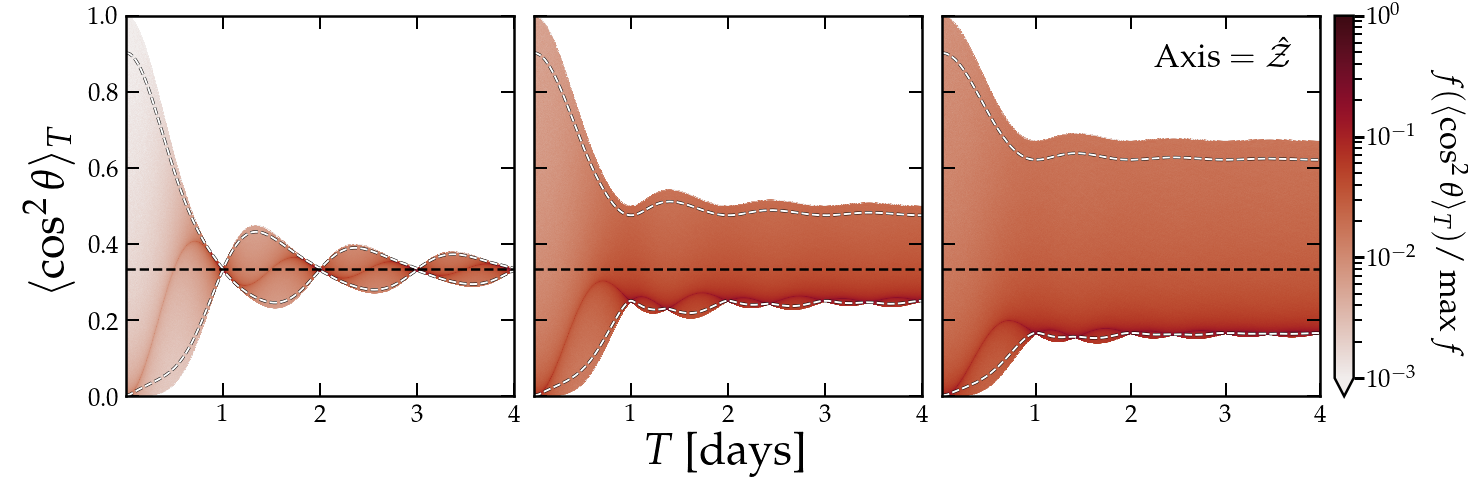

In [33]:
xlab = r'$T$ [days]'
ylab = r'$\langle\cos^2{\theta}\rangle_T$'
cbar_lab = r'$f(\langle\cos^2{\theta}\rangle_T)/\max{f}$'
fig,ax1,ax2,ax3 = MyTriplePlot(xlab2=xlab,ylab1=ylab,wspace=0.05,width_ratios=[1,1,1.06],size_x=22)

Plot_costh_T_histogram(ax1,T,ce,H1,C1_05,C1_95,cmap,lat1,direction_label)
Plot_costh_T_histogram(ax2,T,ce,H2,C2_05,C2_95,cmap,lat2,direction_label)
Plot_costh_T_histogram(ax3,T,ce,H3,C3_05,C3_95,cmap,lat3,direction_label,cbar_lab=cbar_lab,cbar_on=True)

plt.gcf().text(0.86,0.78,direction_label,fontsize=33,ha='right')
plt.gcf().text(0.05,0.1,'--',color='w')
ax3.set_yticklabels([])
ax2.set_yticklabels([])

MySaveFig(fig,figname)

In [42]:
direction_label = r'Plane $ = \hat{\mathcal{Z}}$-$\hat{\mathcal{W}}$'
figname = 'ZenithWest_costh_dist'
cmap = cmocean.cm.dense
T,ce,H1,C1_05,C1_50,C1_95 = costh_T_histogram(costh2ZW,lat1,4)
T,ce,H2,C2_05,C2_50,C2_95 = costh_T_histogram(costh2ZW,lat2,4)
T,ce,H3,C3_05,C3_50,C3_95 = costh_T_histogram(costh2ZW,lat3,4)

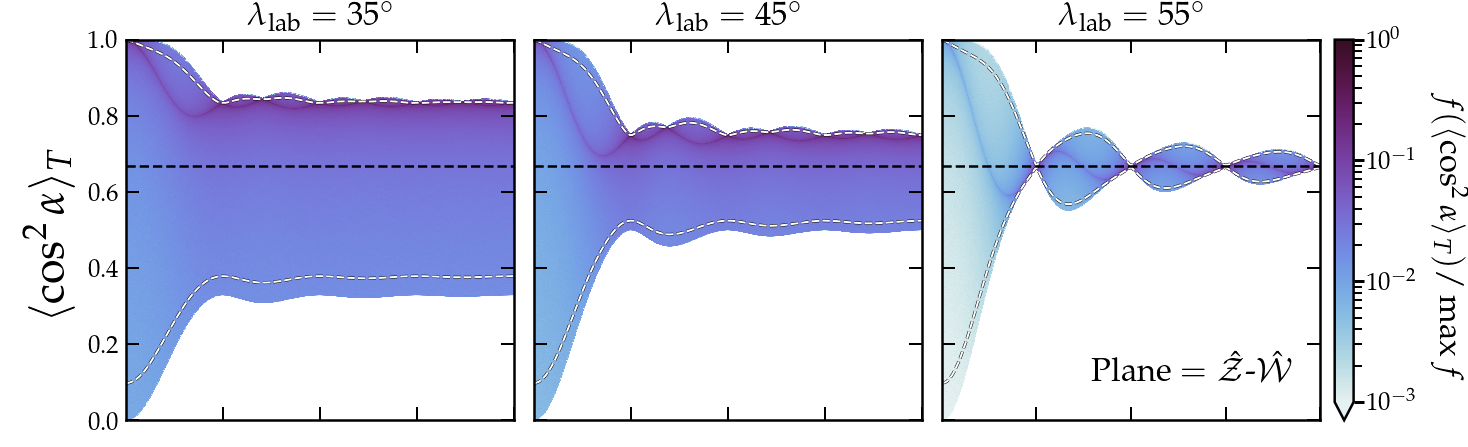

In [43]:
#xlab = r'$T$ [days]'
xlab = ''
ylab = r'$\langle\cos^2{\alpha}\rangle_T$'
cbar_lab = r'$f(\langle\cos^2{\alpha}\rangle_T)/\max{f}$'

fig,ax1,ax2,ax3 = MyTriplePlot(xlab2=xlab,ylab1=ylab,wspace=0.05,width_ratios=[1,1,1.06],size_x=22)

Plot_costh_T_histogram(ax1,T,ce,H1,C1_05,C1_95,cmap,lat1,direction_label,mean_val=2/3)
Plot_costh_T_histogram(ax2,T,ce,H2,C2_05,C2_95,cmap,lat2,direction_label,mean_val=2/3)
Plot_costh_T_histogram(ax3,T,ce,H3,C3_05,C3_95,cmap,lat3,direction_label,cbar_lab=cbar_lab,cbar_on=True,mean_val=2/3)

ax1.set_title(r'$\lambda_{\rm lab} = $ '+str(int(lat1))+r'$^\circ$',fontsize=33)
ax2.set_title(r'$\lambda_{\rm lab} = $ '+str(int(lat2))+r'$^\circ$',fontsize=33)
ax3.set_title(r'$\lambda_{\rm lab} = $ '+str(int(lat3))+r'$^\circ$',fontsize=33)

plt.gcf().text(0.86,0.2,direction_label,fontsize=33,ha='right')
plt.gcf().text(0.05,0.1,'--',color='w')
ax3.set_yticklabels([])
ax2.set_yticklabels([])
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])

MySaveFig(fig,figname)

In [37]:
direction_label = r'Plane $ = \hat{\mathcal{N}}$-$\hat{\mathcal{W}}$'
figname = 'NorthWest_costh_dist'
cmap = cmocean.cm.solar_r
T,ce,H1,C1_05,C1_50,C1_95 = costh_T_histogram(costh2NW,lat1,4)
T,ce,H2,C2_05,C2_50,C2_95 = costh_T_histogram(costh2NW,lat2,4)
T,ce,H3,C3_05,C3_50,C3_95 = costh_T_histogram(costh2NW,lat3,4)

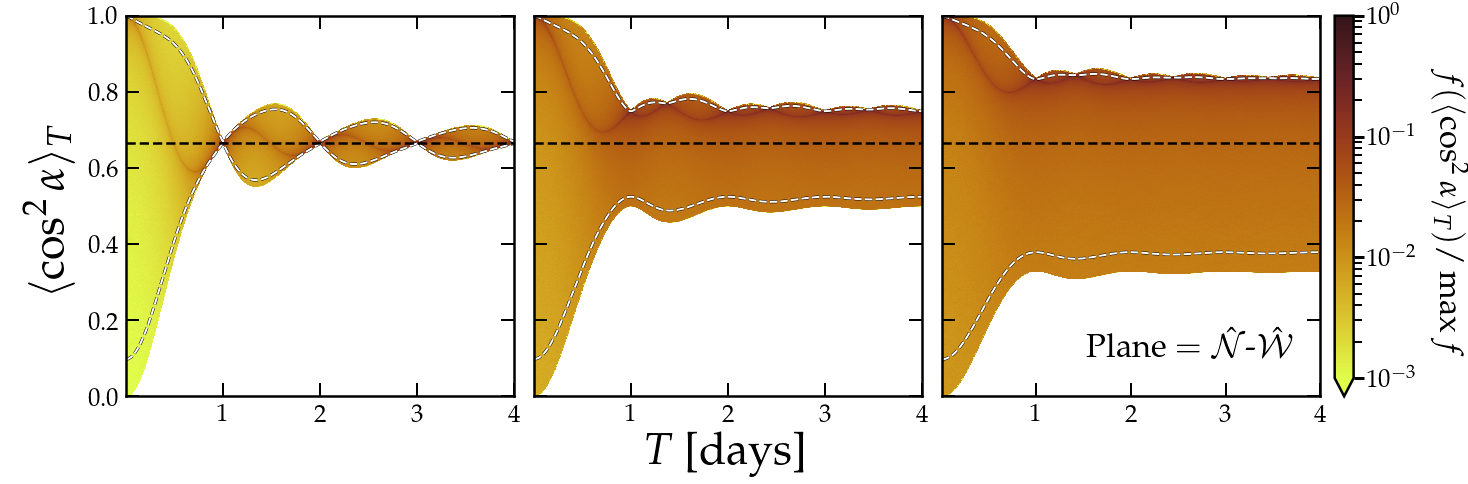

In [41]:
xlab = r'$T$ [days]'
ylab = r'$\langle\cos^2{\alpha}\rangle_T$'
cbar_lab = r'$f(\langle\cos^2{\alpha}\rangle_T)/\max{f}$'

fig,ax1,ax2,ax3 = MyTriplePlot(xlab2=xlab,ylab1=ylab,wspace=0.05,width_ratios=[1,1,1.06],size_x=22)

Plot_costh_T_histogram(ax1,T,ce,H1,C1_05,C1_95,cmap,lat1,direction_label,mean_val=2/3)
Plot_costh_T_histogram(ax2,T,ce,H2,C2_05,C2_95,cmap,lat2,direction_label,mean_val=2/3)
Plot_costh_T_histogram(ax3,T,ce,H3,C3_05,C3_95,cmap,lat3,direction_label,cbar_lab=cbar_lab,cbar_on=True,mean_val=2/3)

plt.gcf().text(0.86,0.2,direction_label,fontsize=33,ha='right')
plt.gcf().text(0.05,0.1,'--',color='w')
ax3.set_yticklabels([])
ax2.set_yticklabels([])

MySaveFig(fig,figname)

In [186]:
def costh_T_05(fcosth2,lat,Tmax,nt=1000,ngen=100000):
    costh_X = 2*random.uniform(size=ngen)-1
    phi_X = 2*pi*random.uniform(size=ngen)
    
    T = linspace(0,Tmax,nt+1)

    c1t = zeros(shape=(ngen,nt+1))

    for i in range(0,nt+1):
        c1t[:,i] = fcosth2(T[i],costh_X,phi_X,lat)

    c_av = cumtrapz(c1t,T)/T[1:]
    
    C_05 = zeros(shape=nt)
    for i in range(0,nt):
        sort_c = sort(c_av[:,i])
        C_05[i] = sort_c[int(0.05*ngen)]
    
    return T[1:],C_05

nlats = 10
lats = linspace(35,55,nlats)
nt = 1000
CN = zeros(shape=(nlats,nt))
for i in range(0,nlats):
    T,CN[i,:] = costh_T_05(costh2N,lats[i],3,nt=nt)
    print(i)

T,CW = costh_T_05(costh2W,lat1,3)

0
1
2
3
4
5
6
7
8
9


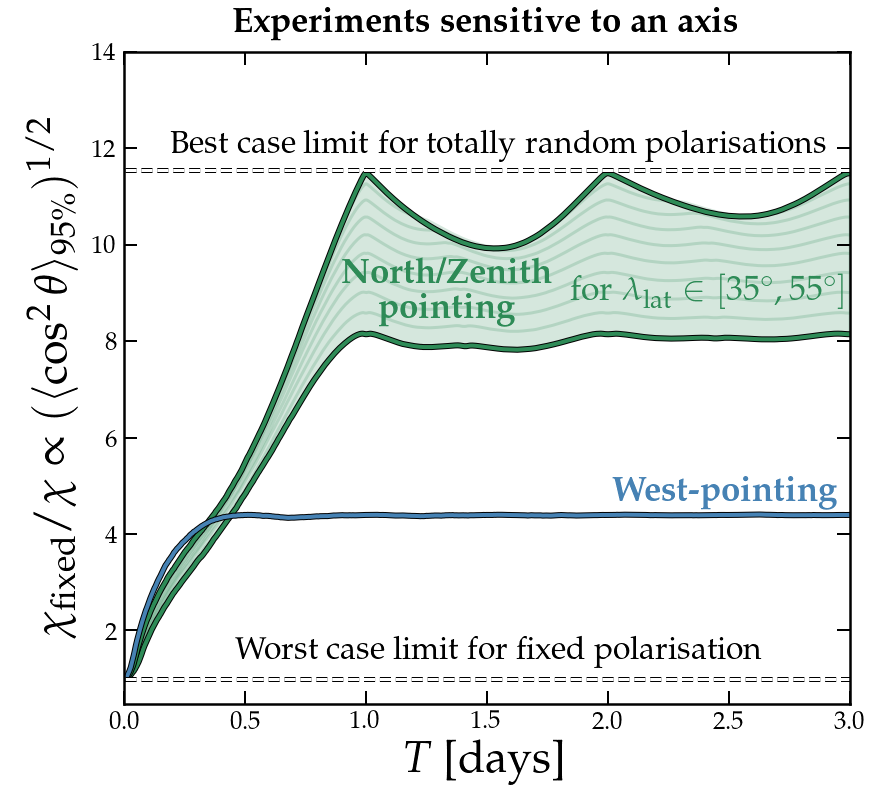

In [299]:


pek=[pe.Stroke(linewidth=6, foreground='k',alpha=1), pe.Normal()]
pek1=[pe.Stroke(linewidth=5, foreground='k',alpha=1), pe.Normal()]

fig,ax = MySquarePlot(r'$T$ [days]',r'$\chi_{\rm fixed}/\chi \propto (\langle\cos^2{\theta}\rangle_{95\%})^{1/2}$')

plt.fill_between(T,sqrt(CN[0,:]*T)/sqrt(0.0025*T),y2=sqrt(CN[-1,:]*T)/sqrt(0.0025*T),lw=3,color='seagreen',alpha=0.2)
for i in range(0,nlats):
    plt.plot(T,sqrt(CN[i,:]*T)/sqrt(0.0025*T),'-',lw=3,color='seagreen',alpha=0.2)
    
plt.plot(T,sqrt(CN[0,:]*T)/sqrt(0.0025*T),'-',lw=4,color='seagreen',path_effects=pek)
plt.plot(T,sqrt(CN[-1,:]*T)/sqrt(0.0025*T),'-',lw=4,color='seagreen',path_effects=pek)

    
plt.plot(T,sqrt(CW*T)/sqrt(0.0025*T),'-',color='steelblue',lw=4,path_effects=pek)


plt.plot(T,sqrt(0.3333*T)/sqrt(0.0025*T),'w--',lw=3,path_effects=pek1)
plt.plot(T,0*T+1,'w--',lw=3,path_effects=pek1)

plt.xlim(right=T[-1],left=0)
plt.ylim(top=14)
plt.gcf().text(0.00,0.1,'--',color='w')


plt.text(1.55,11.9,'Best case limit for totally random polarisations',ha='center',fontsize=32)
plt.text(1.55,1.4,'Worst case limit for fixed polarisation',ha='center',fontsize=32)

plt.text(2.95,4.7,r'{\bf West-pointing}',color='steelblue',fontsize=35,ha='right')
plt.text(1.34,9.2,r'{\bf North/Zenith}',fontsize=35,color='seagreen',ha='center')
plt.text(1.34,8.5,r'{\bf pointing}',fontsize=35,color='seagreen',ha='center')

plt.text(2.99,8.7,r' for $\lambda_{\rm lat} \in [35^\circ,55^\circ]$',fontsize=34,color='seagreen',ha='right')

plt.title(r'{\bf Experiments sensitive to an axis}',fontsize=35,pad=20)
MySaveFig(fig,'Improvement_Axis')

In [145]:
nlats = 10
lats = linspace(35,55,nlats)
nt = 1000
CZW = zeros(shape=(nlats,nt))
for i in range(0,nlats):
    T,CZW[i,:] = costh_T_05(costh2ZW,lats[i],3,nt=nt)
    print(i)

T,CZN = costh_T_05(costh2ZN,lat1,3)

0
1
2
3
4
5
6
7
8
9


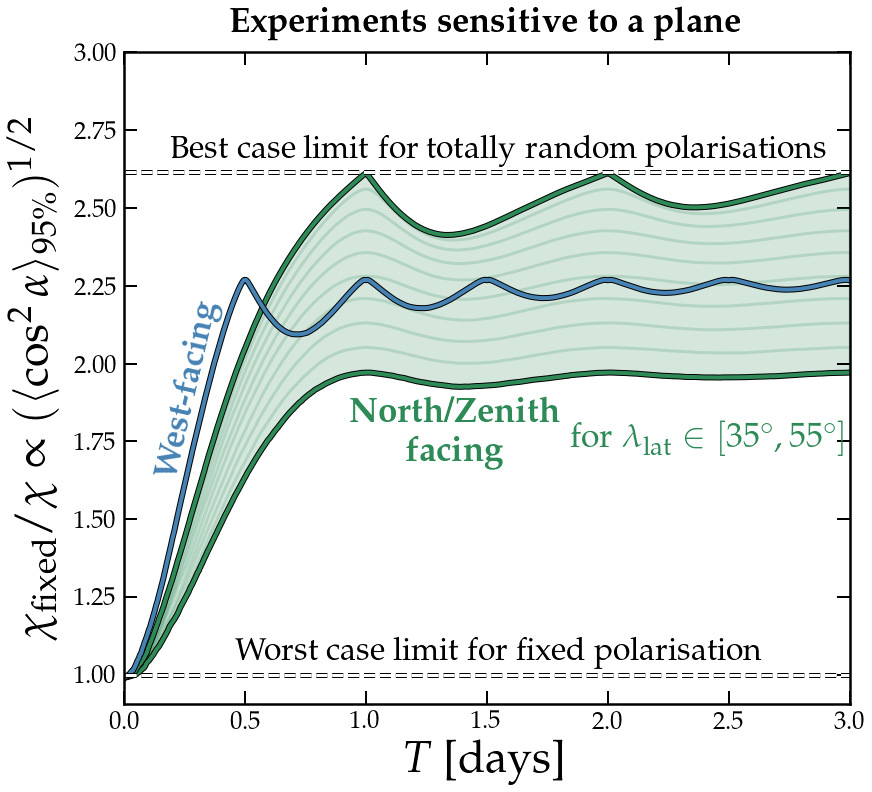

In [298]:


pek=[pe.Stroke(linewidth=6, foreground='k',alpha=1), pe.Normal()]
pek1=[pe.Stroke(linewidth=5, foreground='k',alpha=1), pe.Normal()]

fig,ax = MySquarePlot(r'$T$ [days]',r'$\chi_{\rm fixed}/\chi \propto (\langle\cos^2{\alpha}\rangle_{95\%})^{1/2}$')

plt.fill_between(T,sqrt(CZW[0,:]*T)/sqrt(0.0975*T),y2=sqrt(CZW[-1,:]*T)/sqrt(0.0975*T),lw=3,color='seagreen',alpha=0.2)
for i in range(0,nlats):
    plt.plot(T,sqrt(CZW[i,:]*T)/sqrt(0.0975*T),'-',lw=3,color='seagreen',alpha=0.2)
    
plt.plot(T,sqrt(CZW[0,:]*T)/sqrt(0.0975*T),'-',lw=4,color='seagreen',path_effects=pek)
plt.plot(T,sqrt(CZW[-1,:]*T)/sqrt(0.0975*T),'-',lw=4,color='seagreen',path_effects=pek)

    
plt.plot(T,sqrt(CZN*T)/sqrt(0.0975*T),'-',color='steelblue',lw=4,path_effects=pek)


plt.plot(T,sqrt(0.6666*T)/sqrt(0.0975*T),'w--',lw=3,path_effects=pek1)
plt.plot(T,0*T+1,'w--',lw=3,path_effects=pek1)

plt.xlim(right=T[-1],left=0)
plt.ylim(top=3)
plt.gcf().text(0.00,0.1,'--',color='w')


plt.text(1.55,2.66,'Best case limit for totally random polarisations',ha='center',fontsize=32)
plt.text(1.55,1.05,'Worst case limit for fixed polarisation',ha='center',fontsize=32)

plt.text(0.42,1.65,r'{\bf West-facing}',rotation=77,color='steelblue',fontsize=34,ha='right')

plt.text(1.37,1.81,r'{\bf North/Zenith}',fontsize=35,color='seagreen',ha='center')
plt.text(1.37,1.69,r'{\bf facing}',fontsize=35,color='seagreen',ha='center')
plt.text(2.99,1.71,r' for $\lambda_{\rm lat} \in [35^\circ,55^\circ]$',fontsize=34,color='seagreen',ha='right')


plt.title(r'{\bf Experiments sensitive to a plane}',fontsize=35,pad=20)

MySaveFig(fig,'Improvement_Plane')

In [147]:
def costh_T_histogram(fcosth2,lat,Tmax,nt=2000,nbins=2000,ngen=1000000):
    costh_X = 2*random.uniform(size=ngen)-1
    phi_X = 2*pi*random.uniform(size=ngen)
    
    T = linspace(0,Tmax,nt+1)

    c1t = zeros(shape=(ngen,nt+1))

    for i in range(0,nt+1):
        c1t[:,i] = fcosth2(T[i],costh_X,phi_X,lat)

    c_av = cumtrapz(c1t,T)/T[1:]
    
    C_05 = zeros(shape=nt)
    C_50 = zeros(shape=nt)
    C_95 = zeros(shape=nt)
    H = zeros(shape=(nbins,nt))
    for i in range(0,nt):
        H[:,i],ce = histogram(c_av[:,i],nbins,range=[0,1])
        sort_c = sort(c_av[:,i])
        C_05[i] = sort_c[int(0.05*ngen)]
        C_50[i] = sort_c[int(0.5*ngen)]
        C_95[i] = sort_c[int(0.95*ngen)]
    
    return T[1:],ce,H,C_05,C_50,C_95

ngen = 100000
costh_X = 2*random.uniform(size=ngen)-1
phi_X = 2*pi*random.uniform(size=ngen)
lat = 
costh2ZW(T[i],costh_X,phi_X,lat)

c_av = cumtrapz(c1t,T)/T[1:]

0.09646994610092063

In [256]:
ngen = 100000
costh = 2*random.uniform(size=ngen)-1
th = arccos(costh)

costh_av_1day_W = lambda lat : (sin(th)**2)/2
costh_av_1day_NW = lambda lat : (1/8)*(5+cos(2*lat*pi/180)+(-1+3*cos(2*lat*pi/180))*cos(2*th))


c_av_W_95 = sort(costh_av_1day_W(45))[int(0.05*ngen)]
c_av_NW_95 = sort(costh_av_1day_NW(90))[int(0.05*ngen)]

print(c_av_W_05,c_av_NW_95,c_av_W_95*2)

0.049338130641281036 0.09785232581073289 0.09785232581073287


Text(0, 0.5, '$\\cos^2{\\theta}$')

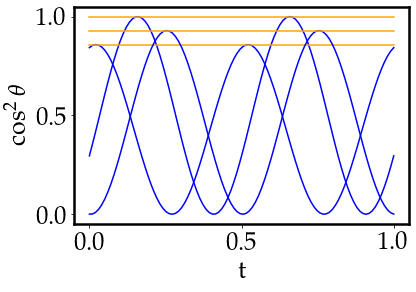

In [255]:
# Axial Zenith
def costh2Z(t,costh_X,phi_X,lat):
    # t in days
    lat *= pi/180
    wt = 2*pi*t
    th_X = arccos(costh_X)
    return (sin(th_X)*cos(phi_X)*cos(lat)*cos(wt) + sin(th_X)*sin(phi_X)*cos(lat)*sin(wt) + costh_X*sin(lat))**2

# Axial, West
def costh2W(t,costh_X,phi_X,lat):
    # t in days
    lat *= pi/180
    wt = 2*pi*t
    th_X = arccos(costh_X)
    return (sin(th_X)*cos(phi_X)*sin(wt) - sin(th_X)*sin(phi_X)*cos(wt))**2

# Planar, North-West
def costh2NW(t,costh_X,phi_X,lat):
    return 1 - costh2Z(t,costh_X,phi_X,lat)


# Just show a couple of examples to get a feeling
ngen = 3
costh_X = 2*random.uniform(size=ngen)-1
phi_X = 2*pi*random.uniform(size=ngen)
t = linspace(0,1,100) # days
for i in range(0,ngen):
    plt.plot(t,costh2W(t,costh_X[i],phi_X[i],45),color='blue')
    plt.plot(t,costh2NW(t,costh_X[i],phi_X[i],90),color='orange')
    
plt.xlabel(r't')
plt.ylabel(r'$\cos^2{\theta}$')

In [200]:
costh_X = 2*random.uniform(size=1000000)-1
sort(1-costh_X**2)[int(0.05*1000000)]

0.09758460408948466

In [196]:
percentile(1-costh_X**2,5)

0.09766110314029135